In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pancancer_evaluation.config as cfg

%load_ext autoreload
%autoreload 2

In [9]:
results_dir = os.path.join(
    cfg.repo_root, '08_cell_line_prediction', 'results', 'tcga_ccle_nn'
)

num_genes = 8000
plot_gene = 'RB1'

In [10]:
lc_df = pd.read_csv(
    os.path.join(results_dir,
                 plot_gene,
                 f'{plot_gene}_signal_mad_s42_n{num_genes}_classify_learning_curves.tsv.gz'),
    sep='\t', index_col=0
).reset_index(drop=True)

print(lc_df.shape)
lc_df.head()

(2400, 5)


,epoch,fold,dataset,metric,value
0,1,0,train,aupr,0.188269
1,2,0,train,aupr,0.334488
2,3,0,train,aupr,0.437309
3,4,0,train,aupr,0.512519
4,5,0,train,aupr,0.559193


Text(0.5, 1.0, 'Learning curve for RB1, averaged over folds')

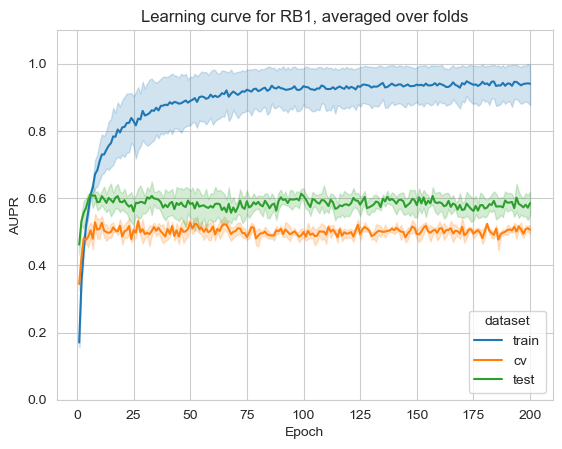

In [11]:
sns.set_style('whitegrid')

sns.lineplot(data=lc_df, x='epoch', y='value', hue='dataset')
plt.xlabel('Epoch')
plt.ylabel('AUPR')
plt.ylim(0, 1.1)
plt.title(f'Learning curve for {plot_gene}, averaged over folds')

Text(0.5, 1.0, 'Learning curve for CDKN2A, for each CV fold')

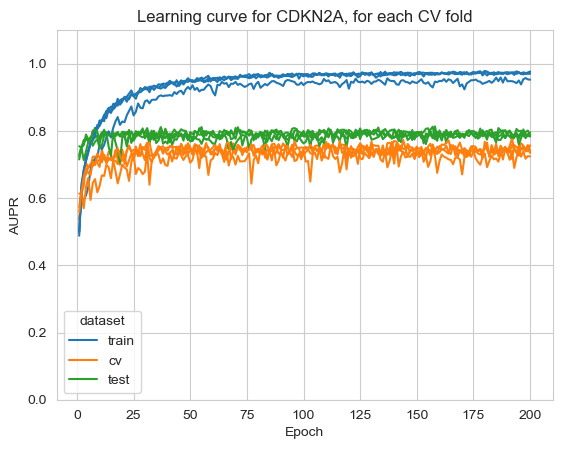

In [5]:
sns.set_style('whitegrid')

for ix, fold in enumerate(lc_df.fold.unique()):
    if ix == 0:
        sns.lineplot(data=lc_df[lc_df.fold == fold],
                     x='epoch', y='value', hue='dataset')
    else:
        sns.lineplot(data=lc_df[lc_df.fold == fold],
                     x='epoch', y='value', hue='dataset', legend=False)
    
plt.xlabel('Epoch')
plt.ylabel('AUPR')
plt.ylim(0, 1.1)
plt.title(f'Learning curve for {plot_gene}, for each CV fold')